- Ensemble Learning: Nhóm phương pháp, mỗi pp là thuật toán được xây dựng từ nhiều mô hình.
- Hybrid Learning: Kết hợp nhiều thuật toán lại với nhau.

- Bagging: Boostrap Aggregation: bias trung bình, variance cao.
- Boosting: Học từ sai số của vòng lặp trước đó: bias cao, variance trung bình
- Stacking: evaluation metric xấp xỉ nhau.

Error = Variance + Bias**2 + Irreducible error

![](https://i.stack.imgur.com/GEJIM.png)

- Bagging: Random Forest
- Boosting: Gradient Boosting, Catboost, Lightgbm, Xgboost

### Random Forest = Row Sampling + Column Sampling + Aggregation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
df = pd.read_csv('cs-training.csv', index_col=0)
df.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [3]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [4]:
df.age.describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [5]:
pd.DataFrame({'age': df.age, 'convert': pd.qcut(df.age, 3, labels=['young', 'medium', 'old'])})

,age,convert
1,45,young
2,40,young
3,38,young
4,30,young
5,49,medium
...,...,...
149996,74,old
149997,44,young
149998,58,medium
149999,30,young


In [6]:
df.loc[df.age < 25, 'new_age'] = 'young'
df.loc[(25 <= df.age) & (df.age < 50), 'new_age'] = 'medium'
df.loc[(50 <= df.age) & (df.age < 80), 'new_age'] = 'old'
df.loc[(df.age >= 50), 'new_age'] = 'extra old'

In [7]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,new_age
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,medium
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,medium
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,medium
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,medium
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,extra old
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,medium
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0,extra old
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,medium


![](https://thefactfactor.com/wp-content/uploads/2019/06/Variables.png)

- Continuous: Measurable 
- Discrete: Countable (numeric)

- Ordinal: Order/ Ranking - >Days of week, Weak/ Medium/ Good/ Excellent --> OrdinalEncoder 
- Nominal: Male / Female, Yes/ No,  Dog / Cat --> OnehotEncoder

- Weak -> 0
- Medium -> 1
- Good -> 2
- Excellent ->3

(Male / Female) --> Male | Female

In [8]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [9]:
OrdinalEncoder().fit_transform(df[['new_age']])

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [10]:
OneHotEncoder().fit_transform(df[['new_age']]).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [11]:
df.new_age.value_counts()

extra old    83619
medium       64306
young         2075
Name: new_age, dtype: int64

### Random Forest

In [12]:
df.shape

(150000, 12)

In [13]:
df.isnull().mean() * 100

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
new_age                                  0.000000
dtype: float64

In [14]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### KNN, K-Nearest Neighbors, Lazy learning

In [15]:
df.SeriousDlqin2yrs.value_counts(normalize=True) * 100

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64

In [16]:
df.drop(columns='new_age', inplace=True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='SeriousDlqin2yrs'), df.SeriousDlqin2yrs, test_size=0.2,
                                                   shuffle=True, stratify=df.SeriousDlqin2yrs, random_state=9)

In [19]:
X_train.shape

(120000, 10)

In [20]:
transformer = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('transformer', transformer, X_train.columns.to_list()),
        ])

params = {
     'n_estimators': 100,
    'max_depth': 5,
    'min_samples_split': 1000,
    'min_samples_leaf': 500,
    'max_features': 1,
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'bootstrap': True,
    'n_jobs': 8,
    'random_state': 9,
    'verbose': 0,
    'max_samples': None,
}

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(**params))])


clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['RevolvingUtilizationOfUnsecuredLines',
                                                   'age',
                                                   'NumberOfTime30-59DaysPastDueNotWorse',
                                                   'DebtRatio', 'MonthlyIncome',
                                                   'NumberOfOpenCreditLinesAndLoans',
                                                   'NumberOfTimes90DaysLate',
                                                   'NumberRealEstateLoansOrLines',
           

In [21]:
y_pred_prob = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

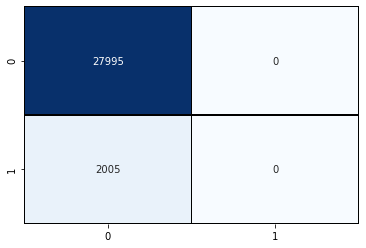

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', cbar=False, annot=True, fmt='d', linewidths=0.2, linecolor='black');

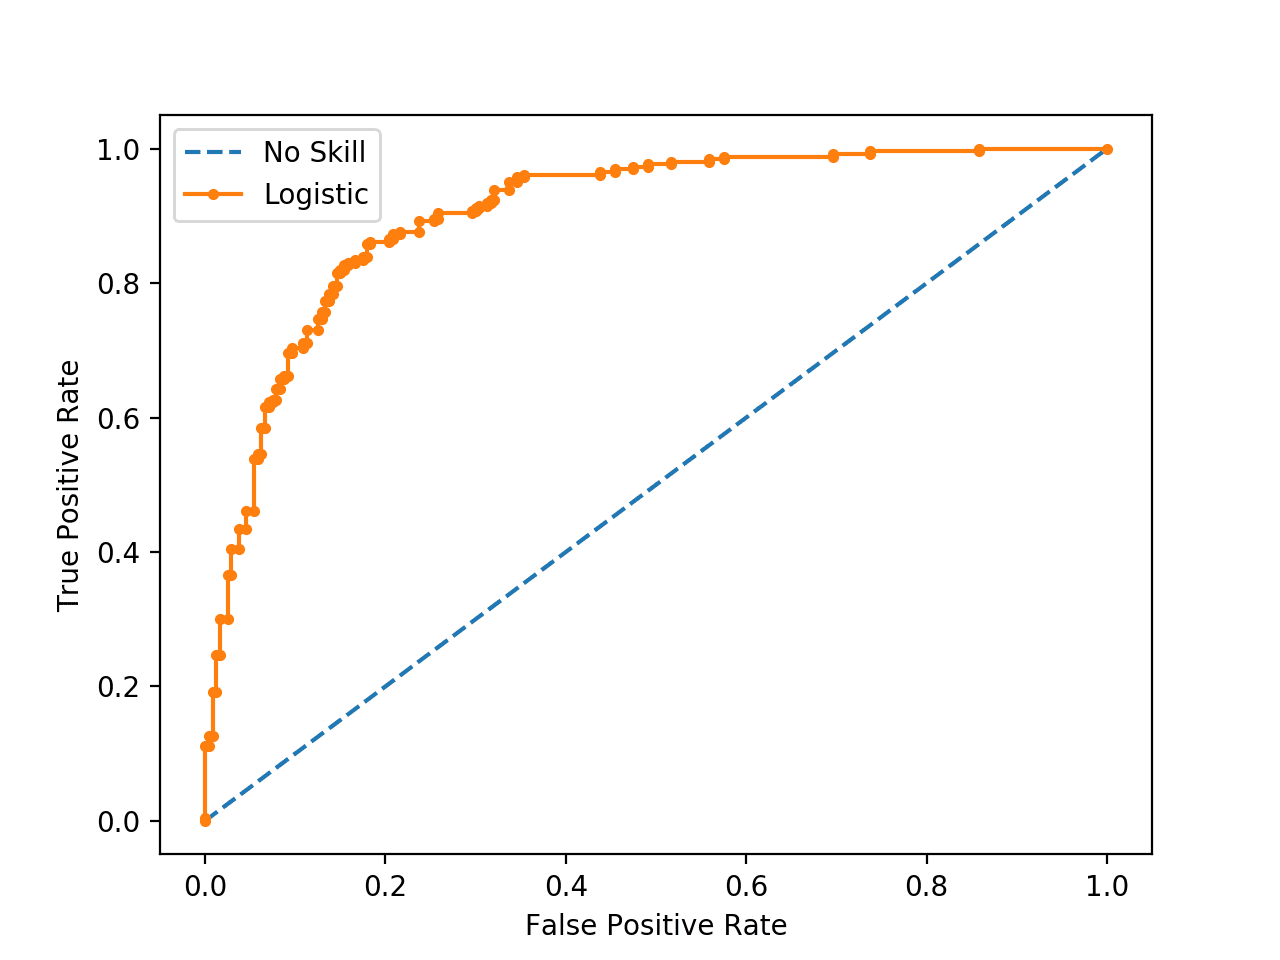

### Tại sao AUC score lại insensitive với imbalance data -> Imbalance data lại dùng AUC score làm thước đo?

In [ ]:
c